# Tutorial: Boosting for Performance: The Gradient Boosting Regressor

Setelah mempelajari *Bagging* dengan Random Forest, saatnya kita beralih ke keluarga *ensemble* besar lainnya: **Boosting**. Jika Random Forest adalah tentang "demokrasi" (semua pohon setara), maka Boosting adalah tentang "belajar dari kesalahan" secara berurutan.

**Gradient Boosting** adalah salah satu implementasi *boosting* yang paling kuat dan populer. Ia seringkali menjadi pilihan utama untuk memenangkan kompetisi *machine learning* karena potensinya untuk mencapai akurasi yang sangat tinggi.

Di notebook ini, kita akan membedah cara kerja Gradient Boosting dan melihat bagaimana ia berbeda dari Random Forest.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan intuisi di balik **Boosting** sebagai proses pembelajaran sekuensial.
* Memahami bagaimana Gradient Boosting melatih pohon baru untuk memperbaiki **kesalahan (residuals)** dari pohon sebelumnya.
* Mengimplementasikan `GradientBoostingRegressor` dari Scikit-learn.
* Mengidentifikasi hyperparameter kunci: `n_estimators` dan `learning_rate`.


---
### 2. Intuisi di Balik Gradient Boosting

Bayangkan Anda membentuk sebuah tim untuk menyelesaikan masalah prediksi yang sulit.


* **Random Forest (Bagging):** Anda memberikan data yang sedikit berbeda kepada setiap anggota tim, meminta mereka bekerja secara **independen**, lalu Anda mengambil **rata-rata** dari semua jawaban mereka.

* **Gradient Boosting:** Anda bekerja secara **sekuensial**.
  1.  Anggota tim pertama (Pohon 1) membuat tebakan awal. Tebakannya mungkin tidak terlalu bagus.
  2.  Anda melihat **di mana Pohon 1 membuat kesalahan terbesar**.
  3.  Anda meminta anggota tim kedua (Pohon 2) untuk **fokus hanya pada kesalahan** yang dibuat oleh Pohon 1 dan mencoba memperbaikinya.
  4.  Anda meminta Pohon 3 untuk memperbaiki kesalahan gabungan dari Pohon 1 + Pohon 2, dan seterusnya.

Setiap model baru tidak mencoba menebak target `y` secara langsung, melainkan ia mencoba menebak **residual (kesalahan)** dari model-model sebelumnya. Prediksi akhir adalah gabungan dari tebakan semua pohon dalam tim.


---
### 3. Setup dan Data

Kita akan menggunakan kembali data non-linear kita untuk melihat bagaimana Gradient Boosting menangani masalah ini.


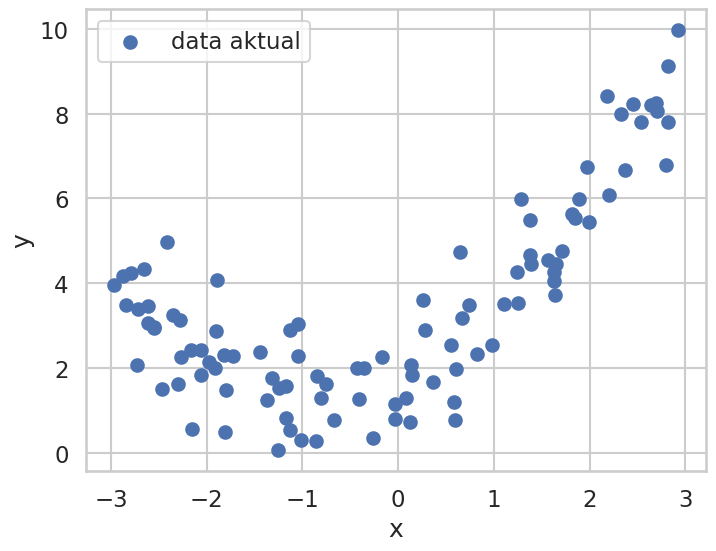

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor # Untuk perbandingan

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Membuat data non-linear
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
Y = Y.ravel()

# Lakukan Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X,Y,label="data aktual")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


---
### 4. Implementasi dengan `GradientBoostingRegressor`

Menggunakan Gradient Boosting di Scikit-learn juga sangat mudah.

**Hyperparameter Kunci:**
* **`n_estimators`**: Jumlah pohon yang akan dilatih secara sekuensial.
* **`learning_rate`**: Mengontrol seberapa besar kontribusi setiap pohon baru terhadap prediksi akhir. Nilai yang lebih kecil (misalnya, 0.05 atau 0.1) berarti setiap pohon hanya membuat perbaikan kecil. Ini **memperlambat proses belajar** tetapi seringkali menghasilkan model yang lebih baik dan lebih tahan terhadap overfitting. Ada **tradeoff** antara `learning_rate` dan `n_estimators`: `learning_rate` yang lebih kecil biasanya membutuhkan `n_estimators` yang lebih besar.
* **`max_depth`**: Sama seperti di Decision Tree, ini mengontrol kedalaman setiap pohon individu. Di Gradient Boosting, pohon-pohon ini biasanya sengaja dibuat sangat "dangkal" (misalnya, `max_depth=3` atau `5`).

In [2]:
gb_reg = GradientBoostingRegressor(n_estimators=120, learning_rate = 0.1, max_depth=2, random_state=42)

# latih model
gb_reg.fit(X_train,Y_train)

print("model gradient boosting berhasil dilatih")

model gradient boosting berhasil dilatih


---
### 5. Membandingkan Prediksi: Gradient Boosting vs. Random Forest

Mari kita lihat bagaimana prediksi dari Gradient Boosting dibandingkan dengan Random Forest.



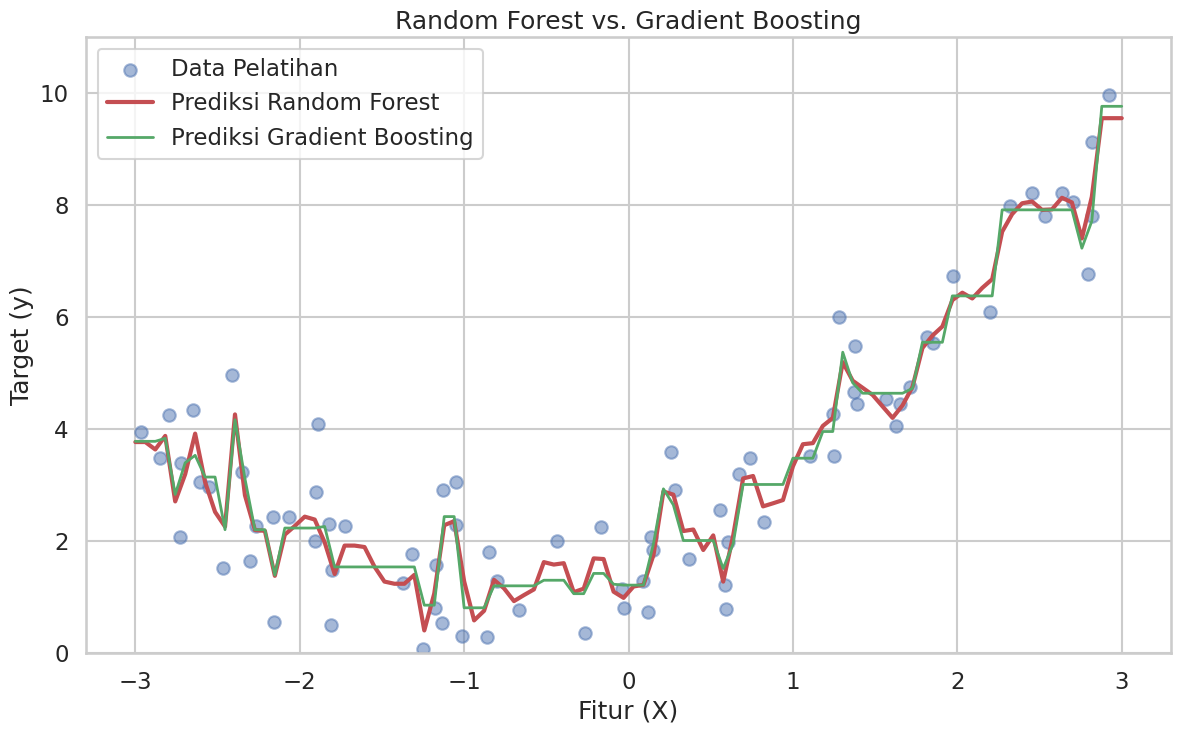

In [3]:
rf_reg = RandomForestRegressor(n_estimators=120, random_state=42)
rf_reg.fit(X_train, Y_train)

X_new = np.linspace(-3,3,100).reshape(-1,1)

# buatkan garis prediksi
Y_pred_gb_reg = gb_reg.predict(X_new)
Y_pred_rf_reg = rf_reg.predict(X_new)

# visualisasi
plt.figure(figsize=(14, 8))
plt.scatter(X_train, Y_train, alpha=0.5, label='Data Pelatihan')
plt.plot(X_new, Y_pred_rf_reg, "r-", linewidth=3, label="Prediksi Random Forest")
plt.plot(X_new, Y_pred_gb_reg, "g-", linewidth=2, label="Prediksi Gradient Boosting")
plt.title("Random Forest vs. Gradient Boosting", fontsize=18)
plt.xlabel('Fitur (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.ylim(0, 11)
plt.show()


**Analisis:**

Keduanya menghasilkan prediksi yang sangat baik dan mulus. Dalam kasus ini, perbedaannya mungkin tidak terlalu dramatis, tetapi seringkali Gradient Boosting (dengan hyperparameter yang tepat) dapat sedikit lebih unggul dalam hal akurasi.




---
### 6. Tradeoff: `learning_rate` vs. `n_estimators`

Mari kita lihat bagaimana `learning_rate` yang rendah membutuhkan lebih banyak pohon untuk mencapai hasil yang sama (atau lebih baik).




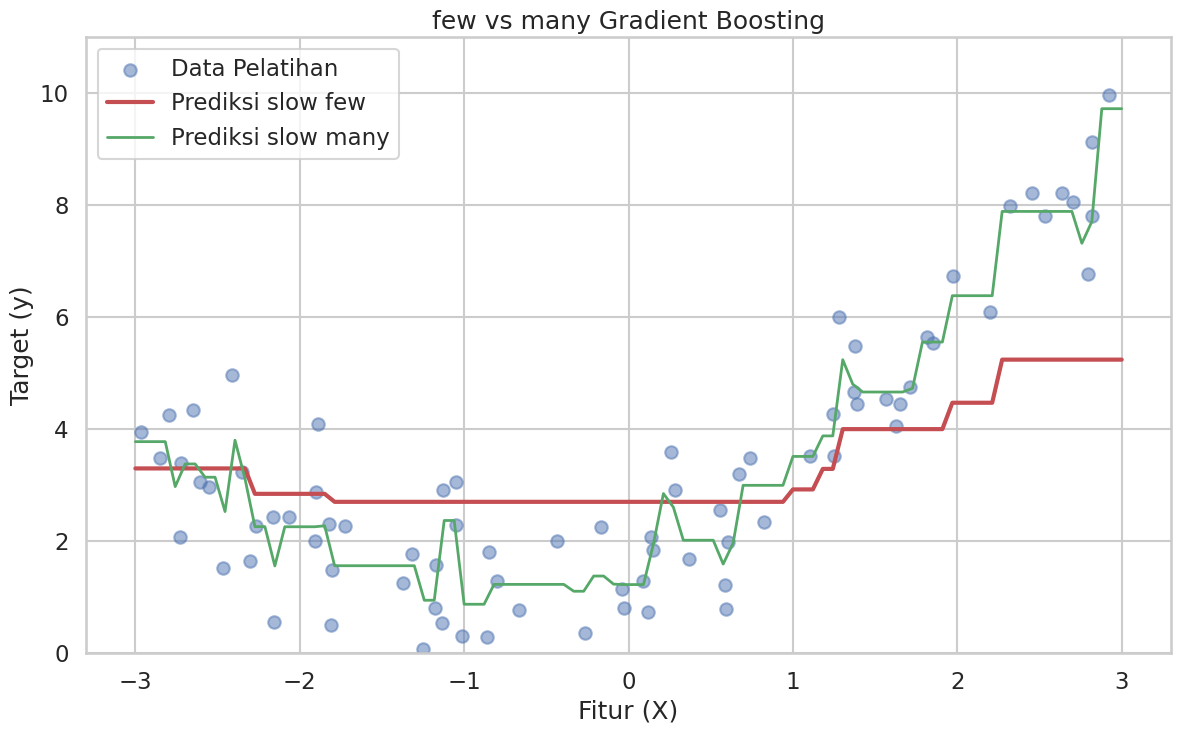

In [4]:
gb_reg_slow_few = GradientBoostingRegressor(n_estimators=10, learning_rate = 0.05, max_depth=2, random_state=42)
gb_reg_slow_many = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.05, max_depth=2, random_state=42)

# latih model
gb_reg_slow_few.fit(X_train,Y_train)
gb_reg_slow_many.fit(X_train,Y_train)

# predict
Y_pred_reg_slow_few = gb_reg_slow_few.predict(X_new)
Y_pred_reg_slow_many = gb_reg_slow_many.predict(X_new)

# visualisasi
plt.figure(figsize=(14, 8))
plt.scatter(X_train, Y_train, alpha=0.5, label='Data Pelatihan')
plt.plot(X_new, Y_pred_reg_slow_few, "r-", linewidth=3, label="Prediksi slow few")
plt.plot(X_new, Y_pred_reg_slow_many, "g-", linewidth=2, label="Prediksi slow many")
plt.title("few vs many Gradient Boosting", fontsize=18)
plt.xlabel('Fitur (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.ylim(0, 11)
plt.show()


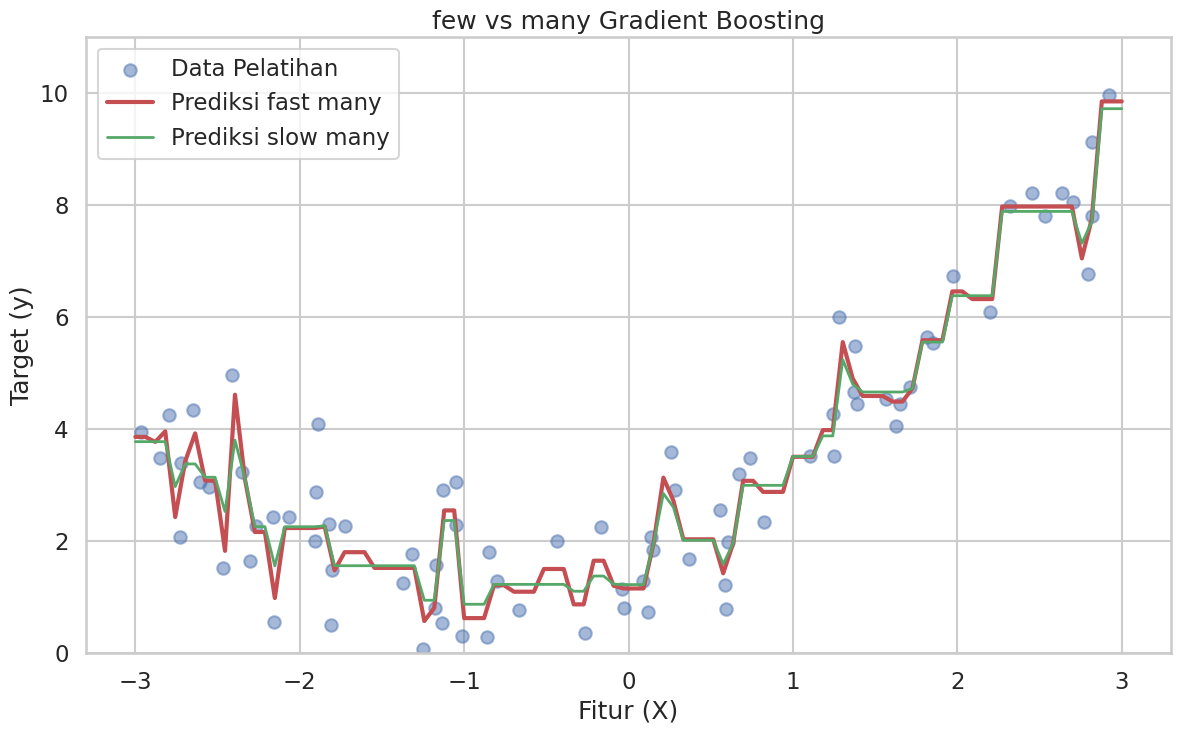

In [5]:
gb_reg_fast_many = GradientBoostingRegressor(n_estimators=200, learning_rate = 0.1, max_depth=2, random_state=42)
# latih model
gb_reg_fast_many.fit(X_train,Y_train)

# predict
Y_pred_reg_fast_many = gb_reg_fast_many.predict(X_new)

# visualisasi
plt.figure(figsize=(14, 8))
plt.scatter(X_train, Y_train, alpha=0.5, label='Data Pelatihan')
plt.plot(X_new, Y_pred_reg_fast_many, "r-", linewidth=3, label="Prediksi fast many")
plt.plot(X_new, Y_pred_reg_slow_many, "g-", linewidth=2, label="Prediksi slow many")
plt.title("few vs many Gradient Boosting", fontsize=18)
plt.xlabel('Fitur (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.ylim(0, 11)
plt.show()

**Observasi:**

Garis merah menunjukkan bahwa dengan `learning_rate` yang rendah, 10 pohon tidak cukup untuk belajar pola data (underfitting). Namun, dengan memberikan lebih banyak pohon (200), model dapat secara perlahan-lahan "merayap" menuju solusi yang sangat baik. Teknik ini disebut **early stopping**, di mana kita bisa berhenti melatih saat performa pada set validasi tidak lagi membaik.



### Kesimpulan

* **Gradient Boosting** adalah model *ensemble* berbasis **Boosting** yang melatih model secara sekuensial.
* Setiap model baru dilatih untuk memperbaiki **kesalahan (residuals)** dari model-model sebelumnya.
* Ia sangat kuat dan seringkali memberikan performa terbaik, tetapi lebih sensitif terhadap *hyperparameter tuning* (`n_estimators`, `learning_rate`) daripada Random Forest.

**Selanjutnya:**
Sekarang kita tahu cara kerja kedua model ensemble utama, mari kita bandingkan keduanya secara langsung dan bahas kapan harus menggunakan masing-masing.
